<a href="https://colab.research.google.com/github/SofianeSofiane/AutoVAI/blob/main/autovai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
 
os.chdir("/content/drive/MyDrive")
 
Dataset='aug_data'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['aug_good', 'aug_defected']


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

 
images = []
labels=[]

kernel= cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

for category in Data_Dir:
    folder_path = os.path.join(Dataset, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)
 
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(grayscale_img,(250, 250))
        denoise_img=cv2.fastNlMeansDenoising(resized_img) 
        ret,img=cv2.threshold(denoise_img,145,255,cv2.THRESH_BINARY_INV)

        edges = cv2.Canny(img,145,255)
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

        images.append(closing)
        labels.append(category)


In [ ]:
import numpy as np
images=np.array(images)
images=np.reshape(images,(images.shape[0],250, 250,1))

import pandas as pd
 
enc_labels=pd.get_dummies(labels)

In [ ]:
from sklearn.model_selection import train_test_split
 
(train_X, test_X, train_y, test_y) = train_test_split(images, enc_labels, test_size=0.20, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.regularizers import l2
 
model=Sequential()
 
model.add(Conv2D(64,(3,3),input_shape=(250, 250, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.3))
 
model.add(Dense(256,activation='relu'))
 
model.add(Dense(128,activation='relu'))
 
model.add(Dense(64,activation='relu'))
 
model.add(Dense(2,kernel_regularizer=l2(0.01),activation='softmax'))


In [ ]:
pip install visualkeras

In [ ]:
import visualkeras

visualkeras.layered_view(model)

In [ ]:
import tensorflow
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size=16

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=10*batch_size)

In [ ]:
from keras.optimizers import Adam

epochs = 50
save_freq=10*batch_size
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

fitted_model = model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.20,
    callbacks=[cp_callback],
    verbose=1)

In [ ]:
import tensorflow as tf
!ls {checkpoint_dir}
latest = tf.train.latest_checkpoint(checkpoint_dir)

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
'''from keras.optimizers import Adam
 
epochs =50
 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
'''import tensorflow
checkpoint_path = "autovai/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
'''fitted_model = model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.20,
    callbacks=[cp_callback],
    verbose=1)

In [ ]:
#transfer learning---------------------------------------

'''import tensorflow
model2=tensorflow.keras.applications.VGG19(include_top=True)

base_inputs=model2.layers[0].input
base_outputs=model2.layers[-2].output
final_output=tensorflow.keras.layers.Dense(2)(base_outputs)

new_model=tensorflow.keras.Model(inputs=base_inputs,outputs=final_output)

from keras.optimizers import Adam
 
epochs =100
 
new_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

new_fitted_model = new_model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.20,
    #callbacks=[cp_callback],
    verbose=1)


In [ ]:
'''import tensorflow as tf
!ls {checkpoint_dir}
latest = tf.train.latest_checkpoint(checkpoint_dir)

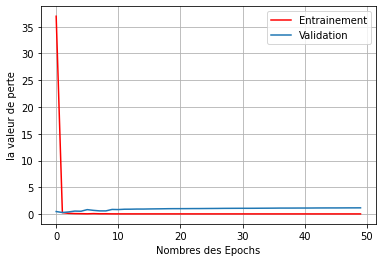

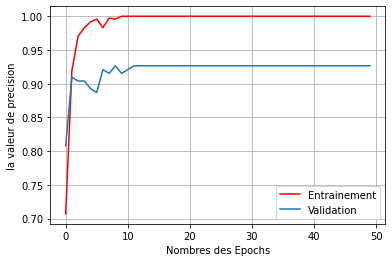

In [ ]:
from matplotlib import pyplot as plt
# Plot Training and Validation Loss
plt.plot(fitted_model.history['loss'],'r',label='Entrainement')
plt.plot(fitted_model.history['val_loss'],label='Validation')
plt.xlabel('Nombres des Epochs')
plt.ylabel('la valeur de perte')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'],'r',label='Entrainement')
plt.plot(fitted_model.history['val_accuracy'],label='Validation')
plt.xlabel('Nombres des Epochs')
plt.ylabel('la valeur de precision')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(model.evaluate(test_X,test_y))

7/7 [==============================] - 2s 253ms/step - loss: 1.0609 - accuracy: 0.9367
[1.060851812362671, 0.9366515874862671]


In [ ]:
pred=model.predict(test_X)
print(pred)
print(test_y)

In [ ]:
pred

In [ ]:
z=test_y['aug_good']-pred[:,1]
j=0
for i in z:
  if i==-1:
    j=j+1

print(len(z))


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[73])

In [ ]:
text_dict={0:'defected' , 1:'non defected'}

In [ ]:
im=cv2.imread('/content/drive/MyDrive/autovai_testimages/good.jpg')
grayscale_img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

resized_img=cv2.resize(grayscale_img,(250, 250))
denoise_img=cv2.fastNlMeansDenoising(resized_img)
ret,img=cv2.threshold(resized_img,145,255,cv2.THRESH_BINARY_INV)
 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
imags=[]
imags.append(closing)
imags=np.array(imags)
imags=np.reshape(imags,(imags.shape[0],250, 250,1))

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(imags[0])
cv2_imshow(resized_img)


In [ ]:
predictions=model.predict(imags)
predictions=np.argmax(predictions)
label=predictions
 
prediction=(text_dict[label])
 
print(prediction)